#### Набор параметров Стасенко

τE = 0.013; τD = 0.08; τY = 3.3; J = 3.07; β = 0.338

alpha = 1.5; U0 = 0.3; ΔU0 = 0.305 I0 = -1.7

In [7]:
using Pkg
Pkg.activate("D:\\Science\\Code\\Julia\\envr")

  Activating project at `D:\Science\Code\Julia\envr`


In [1]:
using StaticArrays, DifferentialEquations, DynamicalSystems, CairoMakie

In [2]:
function TM(u, p, t)

    U(y) = U0 + ΔU0 / ( 1 + exp( -50*(y-ythr) ) )
    σ(x) = 1 / ( 1 + exp( -20*(x-xthr) ) )

    E, x, y = u
    α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0 = p

    du1 = (-E + α * log( 1 + exp( (J * U(y) * x * E + I0  ) / (α) ) ) ) / τ
    du2 = (1-x)/τD - U(y)*x*E
    du3 = (-y)/τy+β*σ(x)
    return SVector(du1, du2, du3)
end;

In [3]:
t = 500.0; tt = 250.0; tstep = 0.001
trange = range(0.0, t, step = tstep)
integ_set = (alg = RK4(), adaptive = false, dt = tstep);

In [4]:
τ = 0.013;  τD = 0.080;  τy = 3.3;  J = 3.07;  β = 0.300
xthr = 0.75; ythr = 0.4
α = 1.58;  U0 = 0.3;  ΔU0 = 0.305;  I0 = -1.0;

In [5]:
p = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0 = SA[8.39353, 0.73803, 0.429055]
ds = ContinuousDynamicalSystem(TM, u0, p)

3-dimensional continuous dynamical system
 state:       [8.39353, 0.73803, 0.429055]
 rule f:      TM
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.58, 0.013, 0.08, 3.3, 3.07, 0.75, 0.4, 0.3, 0.305, 0.3, -1.0]

In [30]:
lb_size = 35; tck_size = 30;

### Regular Spike

In [59]:
p = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, -1.0]
u0 = SA[8.39353, 0.73803, 0.429055]
ds = ContinuousDynamicalSystem(TM, u0, p)

3-dimensional continuous dynamical system
 state:       [8.39353, 0.73803, 0.429055]
 rule f:      TM
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.58, 0.013, 0.08, 3.3, 3.07, 0.75, 0.4, 0.3, 0.305, 0.3, -1.0]

In [60]:
tr = trajectory(ds, t, Δt = tstep; Ttr = tt, diffeq = integ_set)
trange = range(0.0, t, step = tstep);

In [61]:
ts, tf = 1, 15000

(1, 15000)

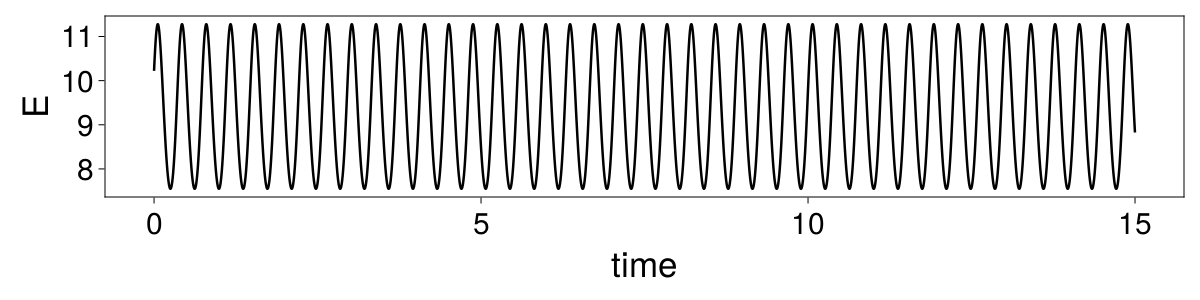

In [62]:
f = Figure(resolution = (1200, 300))
axis = Axis(f[1, 1], xlabel = "time", ylabel = "E",
            xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false)
lines!(axis, trange[ts:tf], tr[ts:tf, 1], linewidth = 2.5, color = :black)
f

In [41]:
save("timeseries_spike_3th.eps", f)

CairoMakie.Screen{EPS}


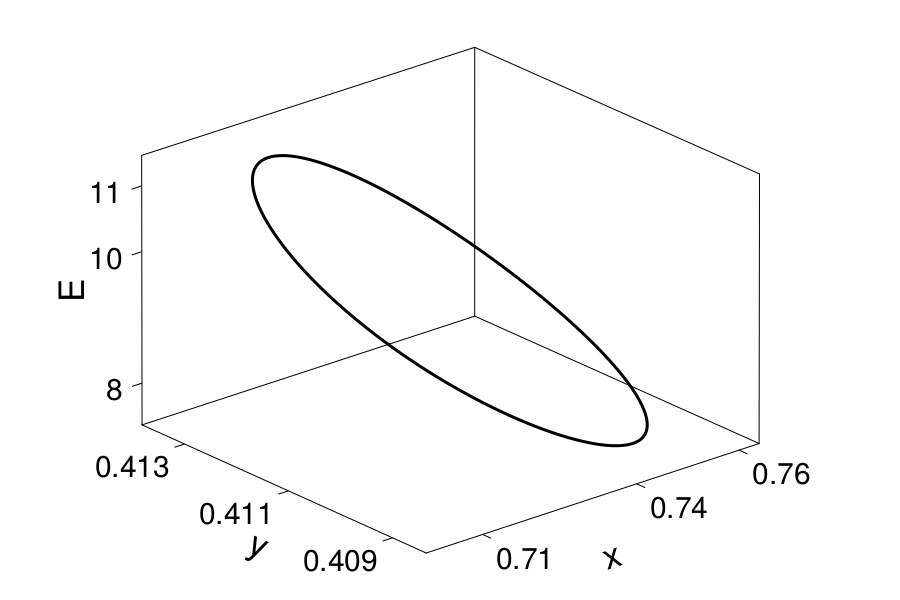

In [68]:
f = Figure(resolution = (900, 600))
axis3 = Axis3(f[1, 1], xlabel = "x", ylabel = "y", zlabel = "E",
                xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
                xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
                xgridvisible = false, ygridvisible = false, zgridvisible = false,
                yticks = [0.409, 0.411, 0.413], xticks = [0.71, 0.74, 0.76], zticks = [8, 10, 11])
lines!(axis3, tr[ts:tf, 2], tr[ts:tf, 3], tr[ts:tf, 1], linewidth = 3.0, color = :black)
f

In [69]:
save("phase_spike_3th.eps", f)

CairoMakie.Screen{EPS}


### Burst mode

In [53]:
p_bur = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, -1.65]
u0_bur = SA[8.39353, 0.73803, 0.429055]
ds_bur = ContinuousDynamicalSystem(TM, u0_bur, p_bur)

3-dimensional continuous dynamical system
 state:       [8.39353, 0.73803, 0.429055]
 rule f:      TM
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.58, 0.013, 0.08, 3.3, 3.07, …, 0.4, 0.3, 0.305, 0.3, -1.65]

In [54]:
tr_bur = trajectory(ds_bur, t, Δt = tstep; Ttr = tt, diffeq = integ_set)
trange = range(0.0, t, step = tstep);

In [55]:
ts, tf = 1, 15000

(1, 15000)

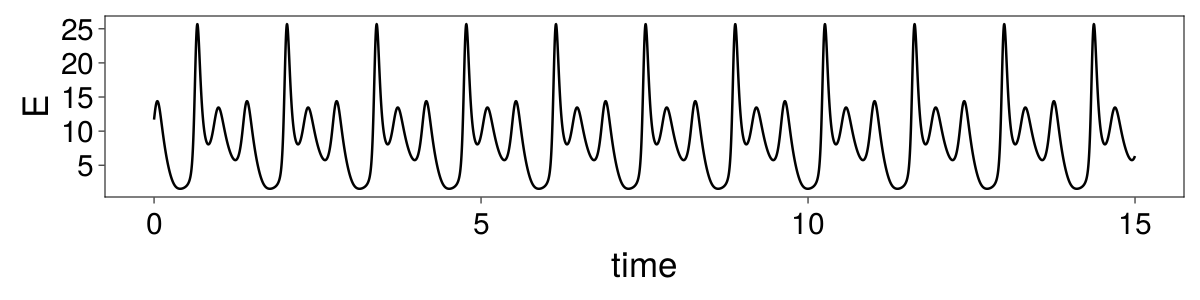

In [56]:
f = Figure(resolution = (1200, 300))
axis = Axis(f[1, 1], xlabel = "time", ylabel = "E",
            xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false)
lines!(axis, trange[ts:tf], tr_bur[ts:tf, 1], linewidth = 2.5, color = :black)
f

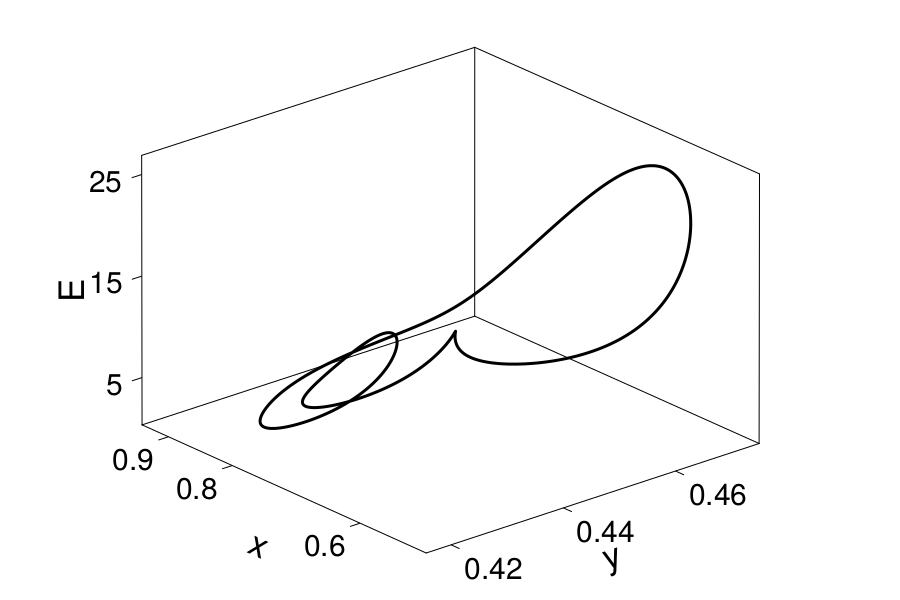

In [57]:
f = Figure(resolution = (900, 600))
axis3 = Axis3(f[1, 1], xlabel = "y", ylabel = "x", zlabel = "E",
                xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
                xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
                xgridvisible = false, ygridvisible = false, zgridvisible = false,
                yticks = [0.6, 0.8, 0.9], zticks = [5, 15, 25])
lines!(axis3, tr_bur[ts:tf, 3], tr_bur[ts:tf, 2], tr_bur[ts:tf, 1], linewidth = 3.0, color = :black)
f

### Chaos

In [12]:
p_chaos = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, -1.820]
u0_chaos = SA[13.543826451566403, 0.5952999600378198, 0.4748946434767823]
ds_chaos = ContinuousDynamicalSystem(TM, u0_chaos, p_chaos)

3-dimensional continuous dynamical system
 state:       [13.5438, 0.5953, 0.474895]
 rule f:      TM
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.58, 0.013, 0.08, 3.3, 3.07, …, 0.4, 0.3, 0.305, 0.3, -1.82]

In [13]:
tr_chaos = trajectory(ds_chaos, t, Δt = tstep; Ttr = tt, diffeq = integ_set);

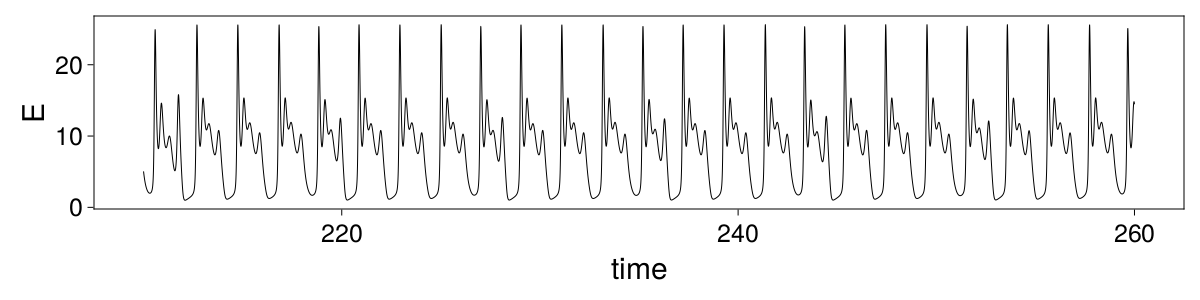

In [28]:
ts, tf = 210000, 260000;
f = Figure(resolution = (1200, 300))
axis = Axis(f[1, 1], xlabel = "time", ylabel = "E",
            xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false)
lines!(axis, trange[ts:tf], tr_chaos[ts:tf, 1], linewidth = 1.0, color = :black)
f

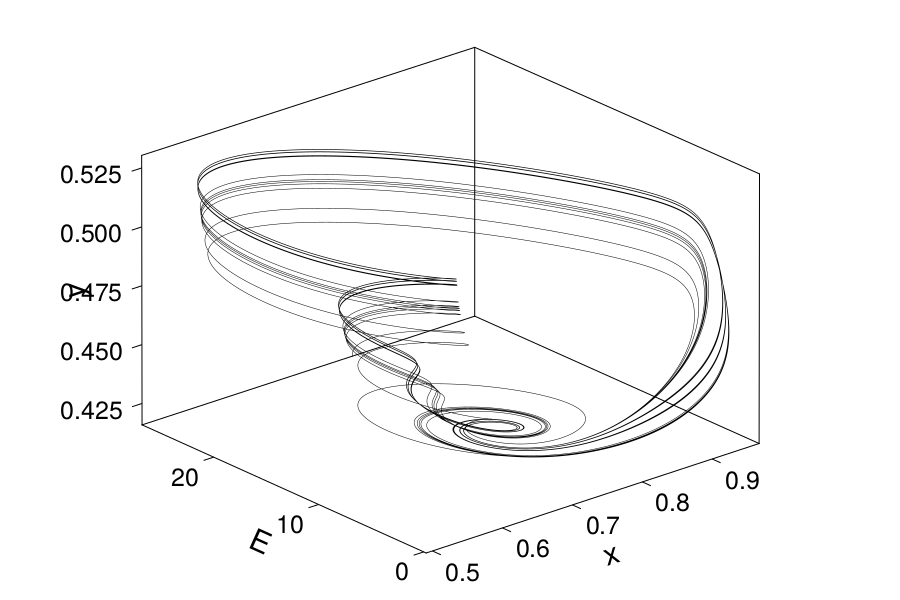

In [29]:
ts, tf = 210000, 260000;
f = Figure(resolution = (900, 600))
axis3 = Axis3(f[1, 1], xlabel = "x", ylabel = "E", zlabel = "y",
                xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
                xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
                xgridvisible = false, ygridvisible = false, zgridvisible = false)
lines!(axis3, tr_chaos[ts:tf, 2], tr_chaos[ts:tf, 1], tr_chaos[ts:tf, 3], linewidth = 0.5, color = :black)
f

### Multistability

In [16]:
p_burst = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, -1.6]
u0_burst = SA[3.8398031438626057, 0.8237522227211204, 0.4265960327571268]
ds_burst = ContinuousDynamicalSystem(TM, u0_burst, p_burst)

3-dimensional continuous dynamical system
 state:       [3.8398, 0.823752, 0.426596]
 rule f:      TM
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.58, 0.013, 0.08, 3.3, 3.07, 0.75, 0.4, 0.3, 0.305, 0.3, -1.6]

In [17]:
p_burst1 = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, -1.6]
u0_burst1 = SA[10.114129259254579, 0.7043935355527935, 0.41019986371663264]
ds_burst1 = ContinuousDynamicalSystem(TM, u0_burst1, p_burst1)

3-dimensional continuous dynamical system
 state:       [10.1141, 0.704394, 0.4102]
 rule f:      TM
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.58, 0.013, 0.08, 3.3, 3.07, 0.75, 0.4, 0.3, 0.305, 0.3, -1.6]

In [18]:
tr_burst = trajectory(ds_burst, t, Δt = tstep; Ttr = tt, diffeq = integ_set)
tr_burst1 = trajectory(ds_burst1, t, Δt = tstep; Ttr = tt, diffeq = integ_set);

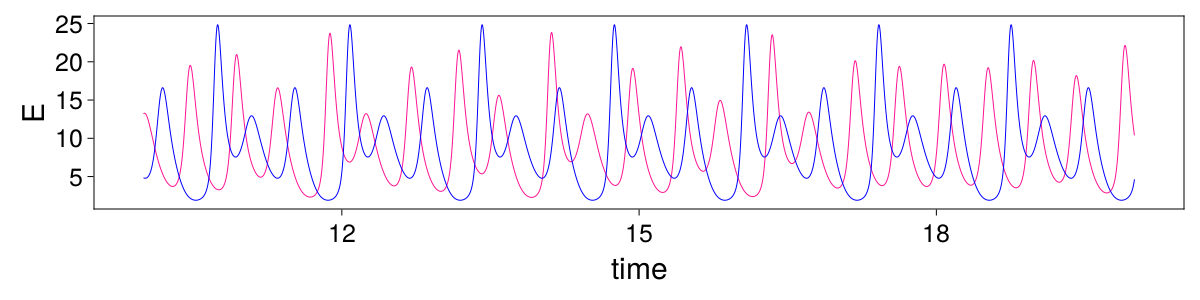

In [19]:
ts, tf = 10000, 20000;
f = Figure(resolution = (1200, 300))
axis = Axis(f[1, 1], xlabel = "time", ylabel = "E",
            xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false)
lines!(axis, trange[ts:tf], tr_burst[ts:tf, 1], linewidth = 1.0, color = :deeppink)
lines!(axis, trange[ts:tf], tr_burst1[ts:tf, 1], linewidth = 1.0, color = :blue)
f

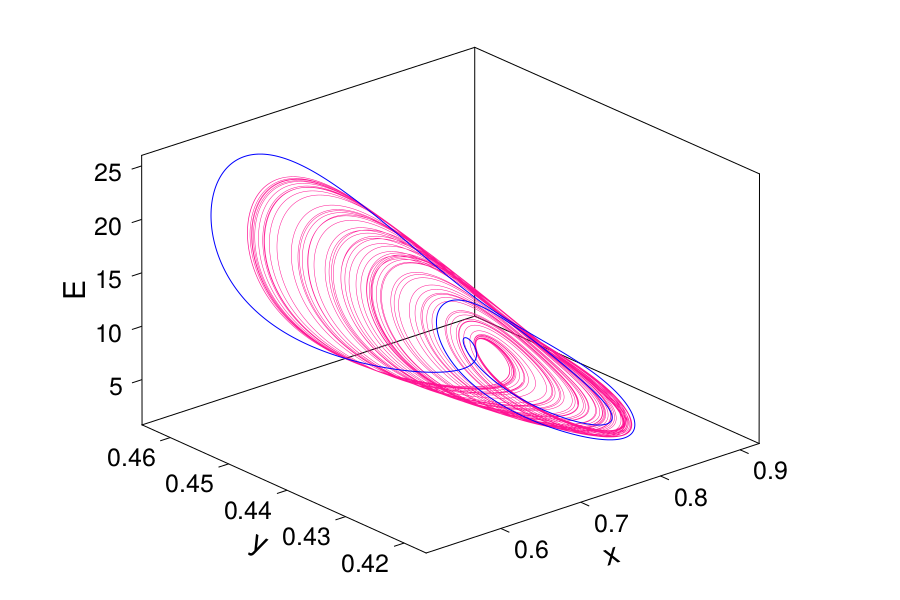

In [20]:
ts, tf = 1, 30000
idx, idy, idz = 2, 3, 1

f = Figure(resolution = (900, 600))
axis3 = Axis3(f[1, 1], xlabel = "x", ylabel = "y", zlabel = "E",
                xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
                xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
                xgridvisible = false, ygridvisible = false, zgridvisible = false)
lines!(axis3, tr_burst[ts:tf, idx], tr_burst[ts:tf, idy], tr_burst[ts:tf, idz], linewidth = 0.5, color = :deeppink)
lines!(axis3, tr_burst1[ts:tf, idx], tr_burst1[ts:tf, idy], tr_burst1[ts:tf, idz], linewidth = 1, color = :blue)
f